In [1]:
import numpy as np
from scipy.stats import * # 다 가져와라ㅏ
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (40, 15)

#### 산술 평균 계산
- 이진 변수에 대한 산술 평균은 1의 비율과 같다. 
- 다른 관측치에 비해 이상치에 민감하다. 

In [2]:
x = [1, 2, 3, 4, 5]
print(np.mean(x))
print(np.array(x).mean()) # array화
print(pd.Series(x).mean()) #series화

3.0
3.0
3.0


In [3]:
# 이진 변수에 대한 평균
x = [1, 0, 0, 0, 1]
print(np.mean(x))  # 1의 비율 값과 같다.

0.4


#### 조화 평균
- 재현율과 정밀도 계산시 사용. 
- 주어진 수들의 역수의 산술평균의 역수를 말한다. 평균적인 변화율을 구할 때에 주로 사용된다. 
- 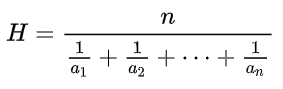
- 전체 거리의 절반을 40km/h 속도로 달리고 남은 절반을 60km/h로 달렸다면, 평균 속력은 40과 60의 조화평균인 48km/h가 된다. 

In [4]:
x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
print(len(x) / np.sum(1/x))  # 직관적으로 수식을 그대로 옮김
print(hmean(x))  # 비율과 비의 평균

0.21897810218978103
0.21897810218978103


#### 절사 평균이 필요한 이유
- 이상치의 영향을 없애고 싶기 때문에
- a 설정의 어려움이 있다. 

In [10]:
income = np.random.normal(2000000, 500000, 100) # 평균이 2백만원이고 표준편차가 50만원인 정규 분포를 따르는 소득을 갖는 100명 생성
print(np.mean(income))

2027140.448037034


In [11]:
income = np.append(income, 10**9) # 소득이 10억원인 사람의 등장

print(np.mean(income)) # 100명의 소득이 200만원에 가까운데, 한 명 때문에 대표값인 평균이 1200만원에 달함


11908059.849541618


#### 절사 평균 계산

In [7]:
trim_mean(income, 0.2) # [20% ~ 80%]  # 소득에 대한 평균도 마찬가지다. 

2042987.8861442045

#### 최빈값 계산
- 연속형 변수에서는 크게 의미가 없다. 
- scipy.stats 사용함. series화 하여 value_counts를 이용할수 있지만, 최빈값이 두개 이상인 경우는 사용이 불가능하다. 

In [9]:
x = np.random.choice(['A', 'B', 'C'], 1000) # A, B, C라는 요소로 구성
x[:10]

array(['B', 'C', 'C', 'C', 'A', 'A', 'A', 'A', 'C', 'C'], dtype='<U1')

In [10]:
mode(x) # [0]: 최빈값, [1]: 빈도

ModeResult(mode=array(['C'], dtype='<U1'), count=array([351]))

In [12]:
pd.Series(x).value_counts().index[0] # 맨 앞에 있는 것이 최빈 값

'C'